# Instrukcja - Transformacja Hougha

### Cel:
- zapoznanie z transformacją Hougha dla pojedynczego punktu,
- kilku punktów, prostych figur
- wykorzystanie transformacji Hougha do detekcji linii prostych na rzeczywistym obrazie
- transformacja Hougha w przestrzeni ab

### Transformacja Hough'a

Transformacja Hougha dla prostych jest metodą detekcji współliniowych punktów. Każda prosta może być jednoznacznie przedstawiona za pomocą dwóch parametrów. Przestrzeń tych parametrów to przestrzeń Hougha. Najczęściej wykorzystywanymi parametrami w tej metodzie są współczynniki ρ,θ

opisujące równanie prostej w postaci normalnej:

ρ=x⋅cos(θ)+y⋅sin(θ)

gdzie: ρ - promień wodzący, θ - kąt pomiędzy ρ a osią OX.

Własności transformacji Hougha:
- prostej w przestrzeni kartezjańskiej odpowiada punkt w przestrzeni Hougha
- pękowi prostych przechdzących przez punkt w przestrzeni kartezjańskiej odpowiada krzywa sinusoidalna w przestrzeni Hougha
- punkty leżące na tej samej prostej (w przestrzeni kartezjańskiej) korespondują z sinusoidami przechodzącymi przez wspólny punkt w przestrzeni Hougha.

Metoda wyliczania transformacji Hougha składa się z następujących kroków:
- przez każdy badany (różny od zera) punkt obrazu prowadzony jest pęk prostych, przechodzących przez ten punkt
- każda z tych prostych transformowana jest do przestrzeni Hougha i tworzy tam punkt o współrzędnych ρ,θ
- w ten sposób, każdy punkt obrazu pierwotnego (pęk prostych) jest odwzorowany w sinusoidalną krzywą w przestrzeni Hougha

Przestrzeń Hougha jest przestrzenią akumulacyjną tzn. punkty sinusoidalnych krzywych, wygenerowanych dla punktów obrazu pierwotnego dodają się w miejscach, w których krzywe te przecinają się. Powstałe w ten sposób (w przestrzeni Hougha) maksima odpowiadają zbiorom punktów, należących do jednej prostej. Współrzędne ρ,θ
tego maksimum jednoznacznie określają położenie prostej na obrazie pierwotnym.

### Transformacja Hougha dla małej liczby punktów.
   1. Uruchom poniższy kod. W tablicy `im` wskaż jeden punkt, dla którego ma zostać obliczona transformata.

(-0.5, 63.5, 63.5, -0.5)

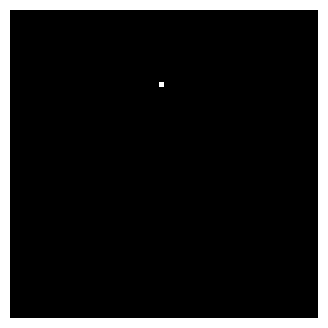

In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from skimage.transform import hough_line, hough_line_peaks
import os
import requests
import math

url = "https://raw.githubusercontent.com/vision-agh/poc_sw/master/11_Hough/"

HOUSE_FILENAME = "dom.png"
SQUARES_FILENAME = "kwadraty.png"
LAB_112_FILENAME = "lab112.png"

for fileName in [HOUSE_FILENAME, SQUARES_FILENAME, LAB_112_FILENAME]:
    if not os.path.exists(fileName):
        r = requests.get(url + fileName, allow_redirects=True)
        open(fileName, "wb").write(r.content)


def get_single_point_image(
    coordinates: list[tuple[int, int]], shape: tuple[int, int] = (64, 64)
):
    result = np.zeros(shape, dtype=np.uint8)
    for y, x in coordinates:
        result[y, x] = 1

    return result


single_point_image = get_single_point_image(coordinates=[(15, 31)])

fig, ax = plt.subplots()
fig.set_size_inches(4, 4)
ax.imshow(single_point_image, "gray")
ax.axis("off")

2. Wykonaj transformację Hougha obazu. Wykorzystaj funkcję `hough_line` z modułu _skimage.transform_. Funkcja zwraca: macierz H (przestrzeń Hougha) oraz dwa wektory theta i rho dla kolejnych 

In [2]:
hough_transform_image, _, _ = hough_line(single_point_image)

3. Wyświetl przestrzeń Hougha za pomocą funkcji _plt.imshow_ (można też wykorzystać poniższą funkcję *show_hough*). Jak "wygląda" pojedynczy punkt w przestrzeni Hougha?

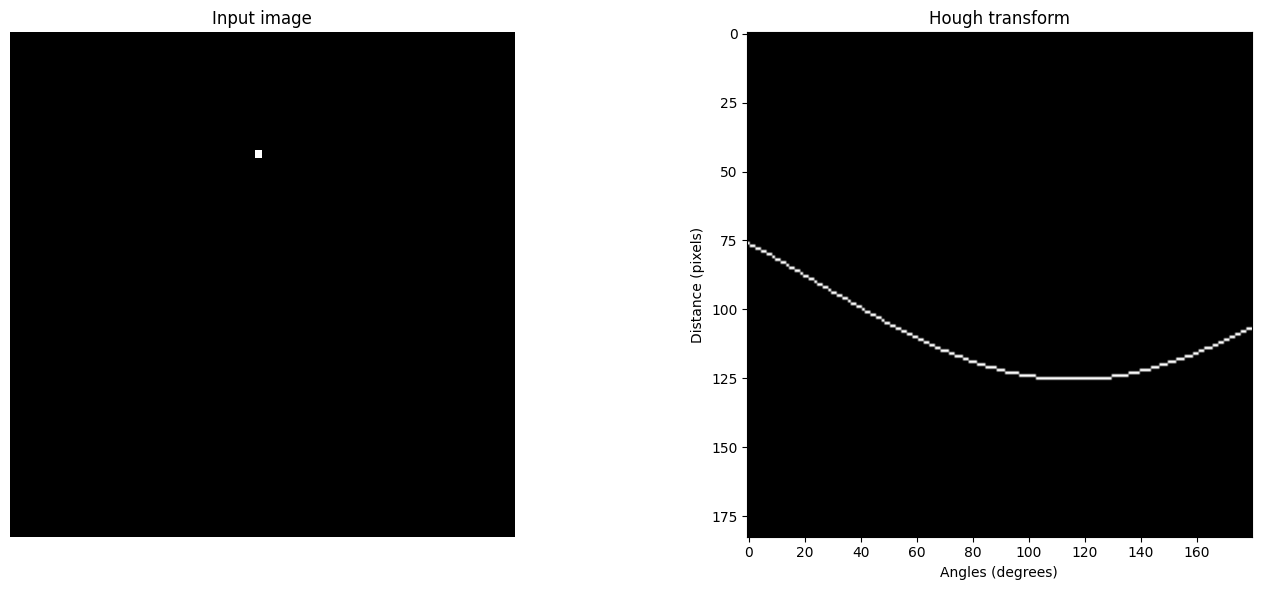

In [3]:
def plot_hough(ax, hough_transform_image):
    ax.imshow(hough_transform_image, "gray")
    ax.set_title("Hough transform")
    ax.set_xlabel("Angles (degrees)")
    ax.set_ylabel("Distance (pixels)")
    ax.axis("image")

    height, width = hough_transform_image.shape
    ax.set_aspect(width / height, adjustable="box")


def show_hough(hough_transform_image, original_image):
    # Generating figure 1
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    (ax1, ax2) = axes.ravel()

    ax1.imshow(original_image, "gray")
    ax1.set_title("Input image")
    ax1.set_axis_off()

    plot_hough(ax2, hough_transform_image)

    plt.tight_layout()
    plt.show()


show_hough(hough_transform_image, single_point_image)

4. Powtórz punkty 1-3, ale tym razem klinkij dwa punkty. Jak zmienia się przestrzeń Hougha?

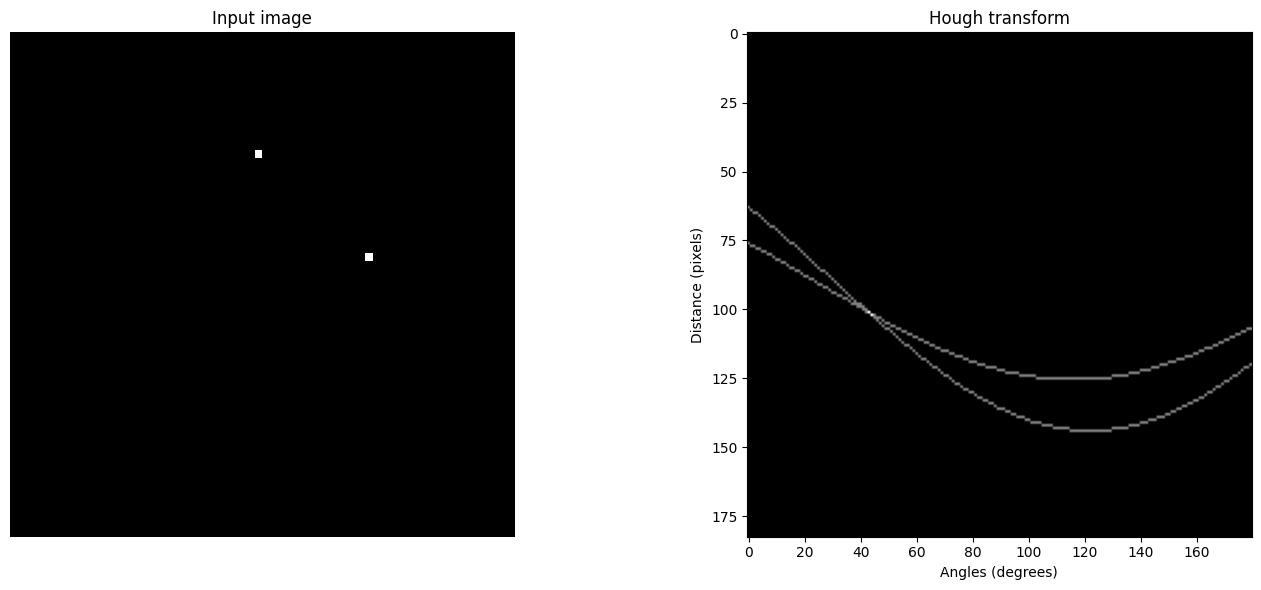

In [4]:
two_points_image = get_single_point_image(
    coordinates=[
        (15, 31),
        (28, 45),
    ]
)
hough_transform_image, _, _ = hough_line(two_points_image)

show_hough(hough_transform_image, two_points_image)

5. Powtórz punkty 1-3, ale tym razem kliknij kilka punktów starając się aby były współliniowe. Zaobserwuj zmiany w przestrzeni Hougha

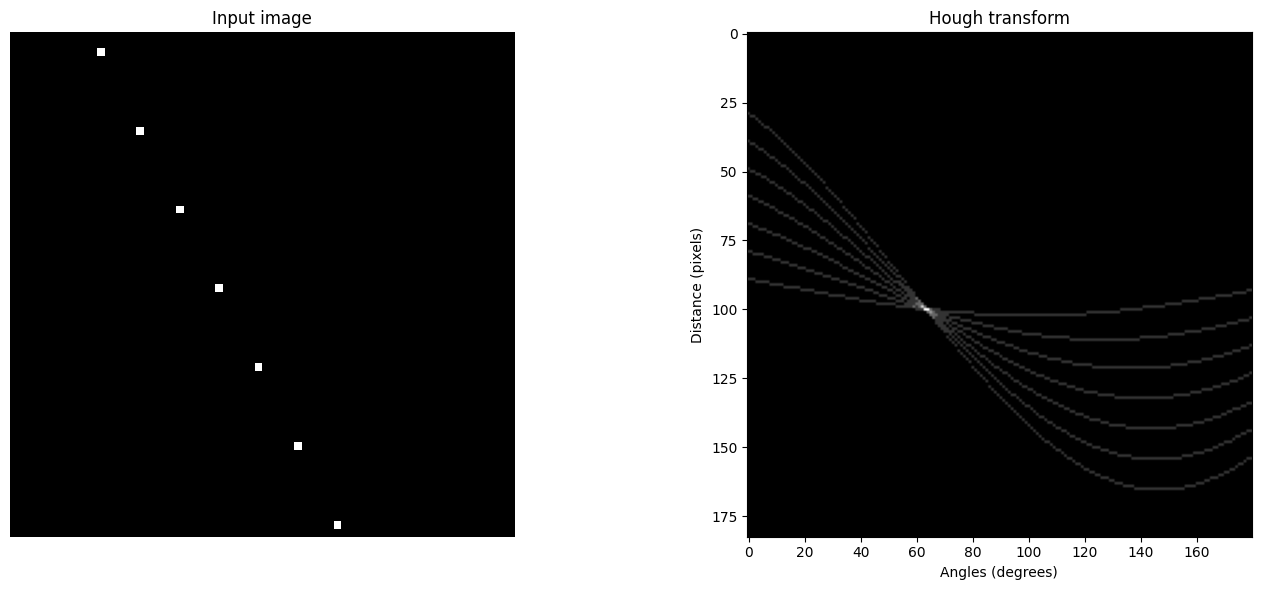

In [5]:
multiple_points_image = get_single_point_image(
    coordinates=[(2 * r, r + 10) for r in range(1, 32, 5)]
)
hough_transform_image, _, _ = hough_line(multiple_points_image)

show_hough(hough_transform_image, multiple_points_image)

6. Poeksperymentuj z różnymi układami punktów

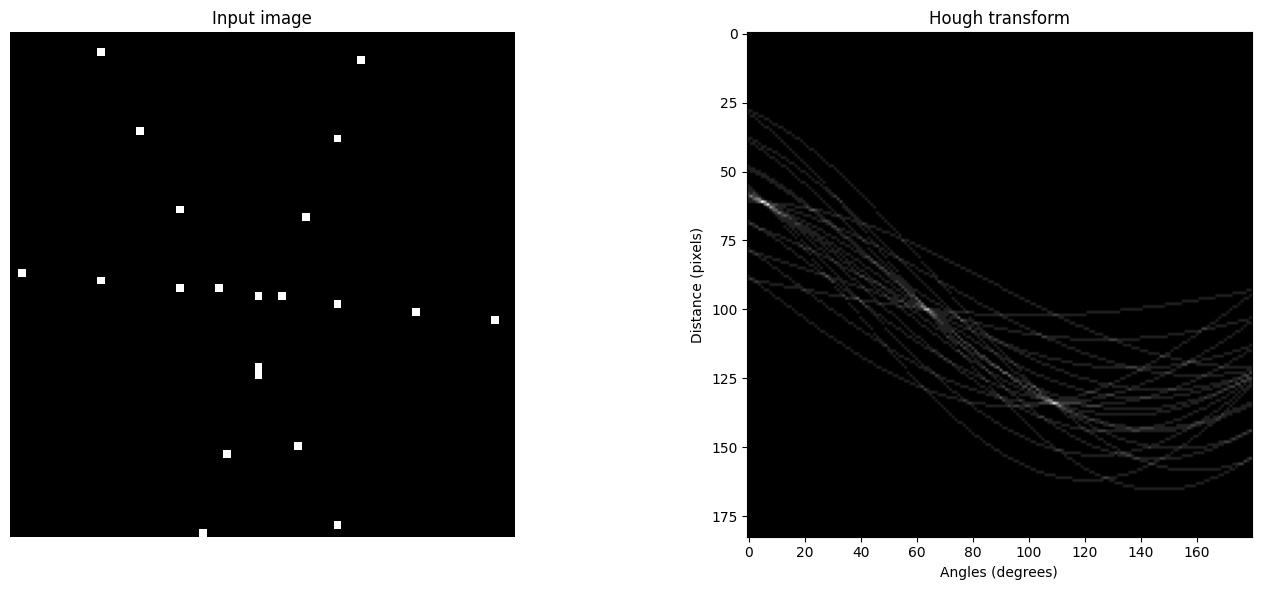

In [6]:
coordinates = (
    [(2 * r, r + 10) for r in range(1, 32, 5)]
    + [(64 - r, r // 3 + 24) for r in range(1, 64, 10)]
    + [(r // 10 + 30, r) for r in range(1, 64, 10)]
)
multiple_points_image = get_single_point_image(coordinates)

hough_transform_image, _, _ = hough_line(multiple_points_image)

show_hough(hough_transform_image, multiple_points_image)

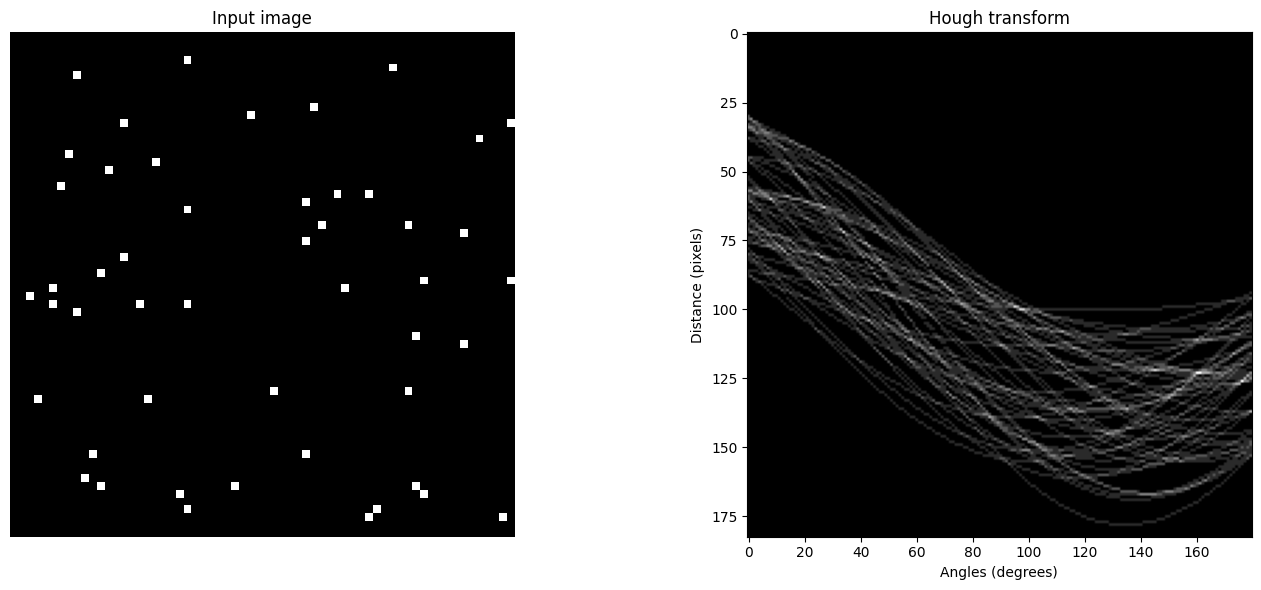

In [7]:
import random

multiple_points_image = get_single_point_image(
    coordinates=[(random.randrange(0, 64), random.randrange(0, 64)) for _ in range(50)]
)

hough_transform_image, _, _ = hough_line(multiple_points_image)

show_hough(hough_transform_image, multiple_points_image)

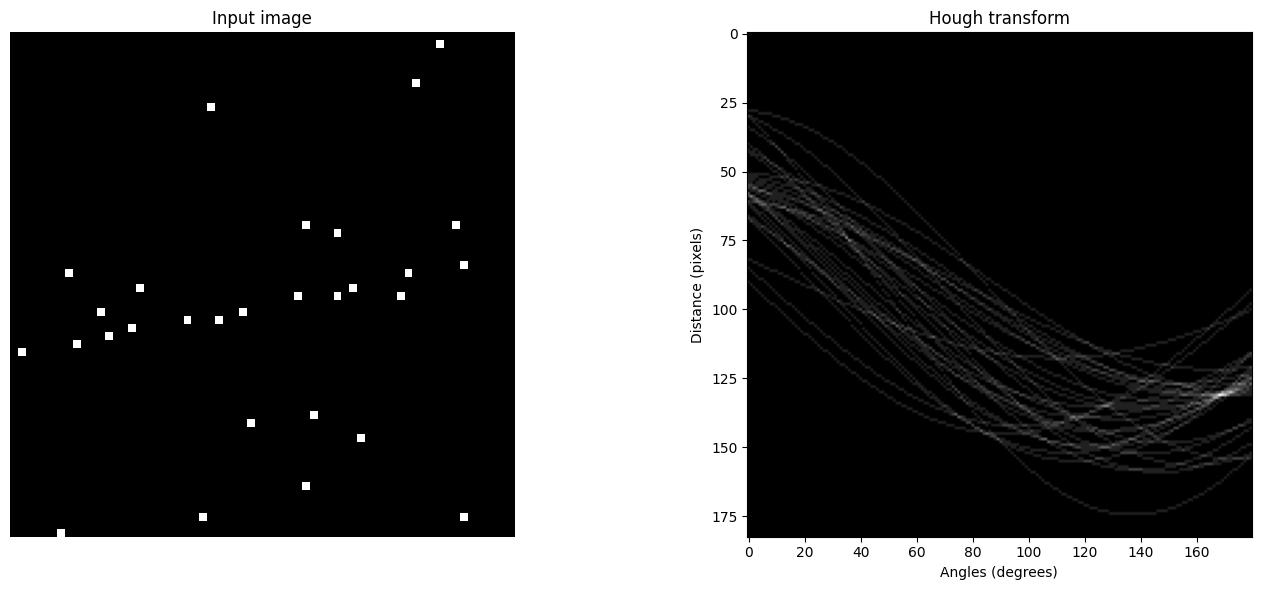

In [8]:
multiple_points_image = get_single_point_image(
    coordinates=[(random.randrange(0, 64), random.randrange(0, 64)) for _ in range(20)]
    + [(40 - r // 5, r) for r in range(1, 64, 7)]
)

hough_transform_image, _, _ = hough_line(multiple_points_image)

show_hough(hough_transform_image, multiple_points_image)

### Transformata Hougha dla pojedynczego obiektu

W tym podpunkcie pokazane zostanie praktycznie wykorzystanie transformaty Hougha - do detekcji prostych na sztucznym rysunku.

1. Wczytaj obraz "kwadraty.png". Wyświetl go.

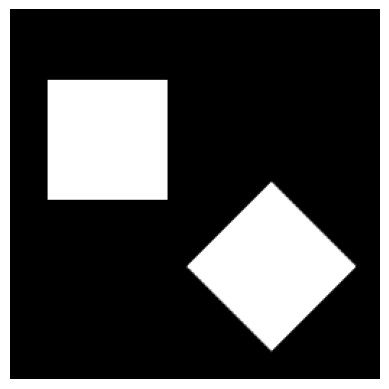

In [9]:
def show_grayscale_image(
    ax, image, title=None, full_scale: bool = False, vmin=None, vmax=None, cmap="gray"
):
    vmin, vmax = (0, 256) if full_scale else (vmin, vmax)
    ax.axis("off")
    ax.imshow(image, cmap, vmin=vmin, vmax=vmax)
    if ax == plt:
        plt.title(title)
    else:
        ax.set_title(title)


squares_image = cv2.imread(SQUARES_FILENAME, flags=cv2.IMREAD_GRAYSCALE)

show_grayscale_image(plt, squares_image)

2. Wykonaj detekcję krawędzi jedną z metod gradientowych. Ważne aby obraz krawędzi był jak najlepszej jakości - co oznacza cienkie (nawet niekoniecznie ciągłe) krawędzie - dla tego przypadku nie powinno być trudne do uzyskania. Wyświetl obraz po detekcji krawędzi.

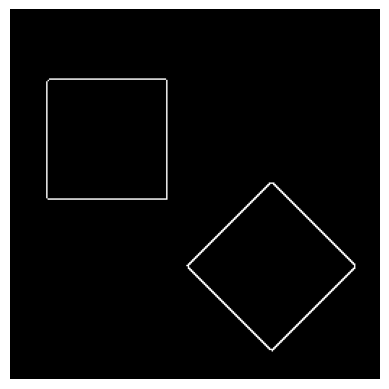

In [10]:
edges_image = cv2.Canny(
    image=squares_image,
    threshold1=50,
    threshold2=200,
)

show_grayscale_image(plt, edges_image)

3. Wykonaj transformatę Hougha obrazu krawędziowego. Wykorzystaj funkcję *hough\_line*.
4. Wyświetl macierz H. Czy widoczna jest taka liczba maksimów jakiej się spodziewamy?

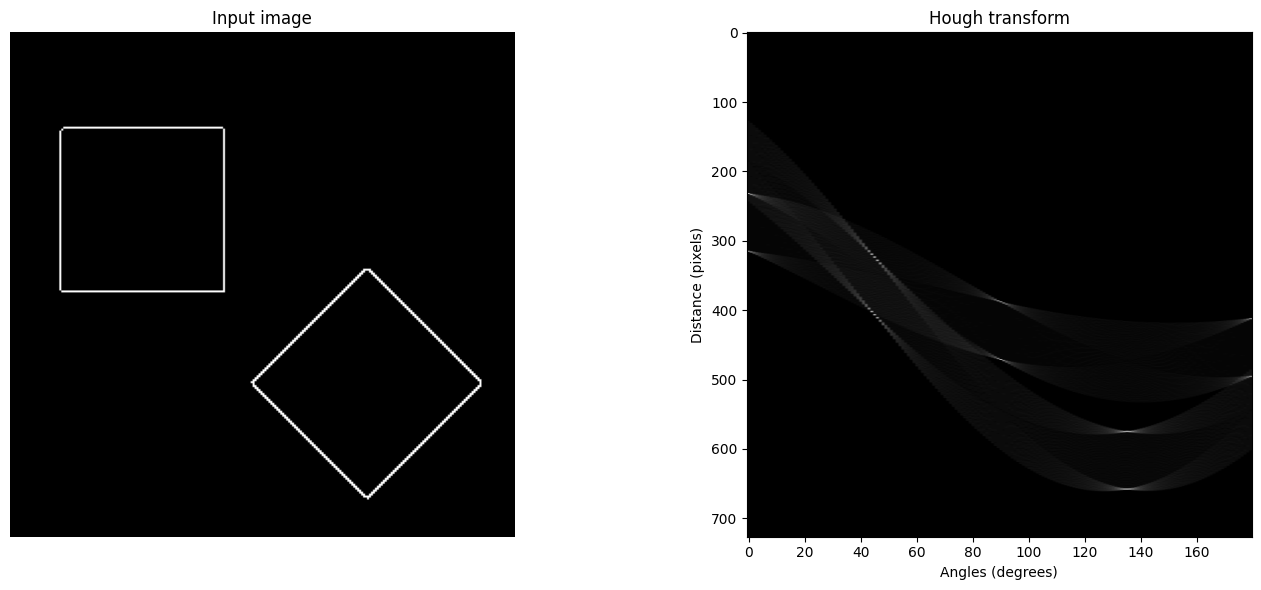

In [11]:
hough_transform_image, _, _ = hough_line(edges_image)

show_hough(hough_transform_image, edges_image)

 5. W module skimage.transform dostępna jest funkcja do automatycznej analizy przestrzeni Hougha - wyszukiwania maksimów - *hough\_line\_peaks*. Jako parametry przyjmuje ona wyniki funkcji *hough\_line* (macierz H, theta i rho). Dodatkowo można podać próg powyżej którego punkt uznawany jest za maksimum (_threshold_ - domyslnie jest to połowa maksimum w przestrzeni H) oraz liczbę poszukiwanych maksimów (*num_peaks*). Funkcja zwraca współrzędne maksimów. Wykorzystaj funkcję *hough\_line\_peaks* do znalezienia maksimów odpowiadających krawędziom kwadratów.

In [12]:
def rad_to_degrees(rad: float) -> float:
    return 180 / math.pi * rad


def degrees_to_rad(degrees: float) -> float:
    return math.pi / 180 * degrees


hough_space, angles, distances = hough_line(edges_image)
img_height, img_width = hough_space.shape

peak_values, peak_angles, peak_distances = hough_line_peaks(
    hough_space, angles, distances
)


peak_distances = [int(dist + img_height / 2) for dist in peak_distances]

peak_angles = [rad_to_degrees(angle_rad) for angle_rad in peak_angles]
peak_angles = [max(0, round(90 + angle_deg)) for angle_deg in peak_angles]

found_points = list(zip(peak_angles, peak_distances))

6. Wyświetl macierz H używając konstrukcji:
    Taki zapis pozwoli na dołożenie annotacji (okręgów) w miejscach znalezionych maksimów. Wyrysowanie okręgu w punkcie x, y (o rozmiarze 10, w czerwonym kolorze, bez wypełnienia środka) realizuje wywołanie: 
    `circle = plt.Circle((x, y), 10, color='r', fill=False)`

    natomiast dołożenie takiego okręgu do obrazu to:

    `ax.add_patch(circle)`

    Zaznacz maksima na obrazie wykorzystując rezultat funkcji *hough\_line\_peaks* biorąc pod uwagę, że zwraca ona kąty w radianach z przedziału od -pi/2 do pi/2, a rho z przedziału od -r/2 do r/2 gdzie r to pionowy rozmiar przestrzeni Hougha. 

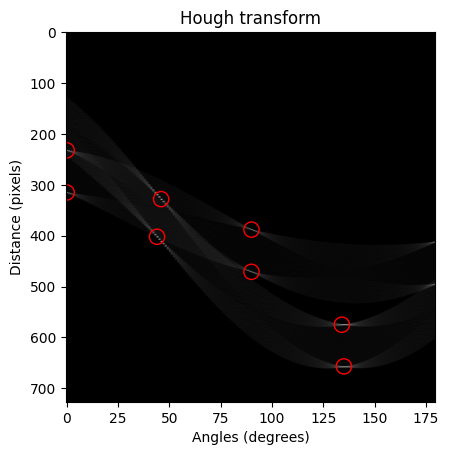

In [13]:
from matplotlib.patches import Ellipse


def draw_circles(ax, image, points: list[tuple[int, int]], radius: int = 30):
    img_height, img_width = image.shape
    circle_height, circle_width = [radius, radius * img_width / img_height]

    for point in points:
        circle = Ellipse(point, circle_width, circle_height, color="r", fill=False)
        ax.add_patch(circle)


fig, ax = plt.subplots()

plot_hough(ax, hough_space)
draw_circles(ax, image=hough_space, points=found_points)

plt.show()

7. Istnieje też możliwość przeprowadzenia transformacji Hougha z użyciem biblioteki OpenCV. W bibliotece znajdują się dwie wersje funkcji wyszukującej linie proste - 'klasyczna' - `HoughLines()` oraz probabilistyczna `HoughLinesP()`. Zadna z nich nie zwraca przestrzeni Hougha. Wynikiem działania pierwszej jest lista parametrów prostych (krotki zawierające rho, theta). Druga zwraca krotki 4-ro elementowe ze współrzędnymi końców odcinków wykorzystanych do wylicznia parametrów (czyli znalezienia prostej). 
8. Wyznacz linie obecne na obrazie za pomocą funkcji `HoughLines()`. Wykryte linie wyrysuj na obrazie początkowym (UWAGA: wczytanym bez konwersji na graylevel). Do wyświetlania linii wykorzystaj przykładowy kod:

In [14]:
from cv2 import HoughLines, HoughLinesP


def find_lines(image, threshold: int):
    hough_lines = HoughLines(image, rho=1, theta=degrees_to_rad(1), threshold=threshold)

    parameters = [tuple(line) for [line] in hough_lines]

    lines = []
    for rho, theta in parameters:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))

        lines.append(
            [
                (x0, y0),
                (x1, y1),
                (x2, y2),
            ]
        )

    return lines

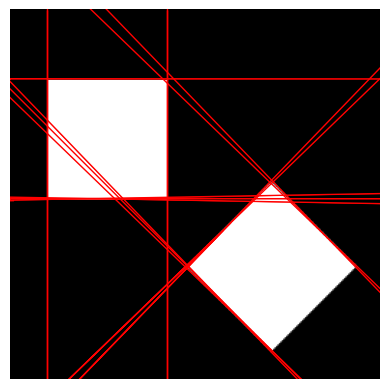

In [15]:
from matplotlib.pyplot import Polygon


def draw_lines(ax, lines: list[list[tuple[int, int]]]):
    for points in lines:
        line = Polygon(points, color="r", closed=False)

        ax.add_patch(line)


found_lines = find_lines(image=edges_image, threshold=60)

fig, ax = plt.subplots()

show_grayscale_image(ax, image=squares_image)
draw_lines(ax, lines=found_lines)

plt.show()

9. Wyznacz odcinki obecne na obrazie za pomocą funkcji _HoughLinesP_. Wykryte odcinki wyrysuj na obrazie początkowym (UWAGA: wczytanym bez konwersji na graylevel). 

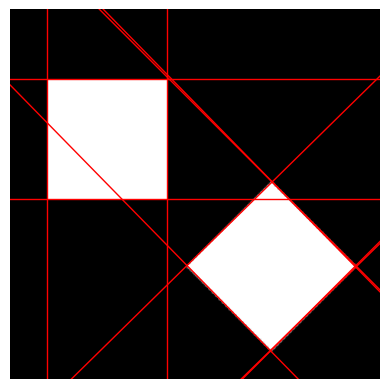

In [16]:
def find_lines_propabilistic(
    image,
    threshold: int,
    scale_factor: float | None = 10,
    min_line_length: float = None,
    max_line_gap: float = None,
):
    hough_lines = HoughLinesP(
        image,
        rho=1,
        theta=degrees_to_rad(1),
        threshold=threshold,
        minLineLength=min_line_length,
        maxLineGap=max_line_gap,
    )

    found_lines = [
        ((x0, y0), (x1, y1)) for line in hough_lines for (x0, y0, x1, y1) in line
    ]

    if scale_factor is None:
        return found_lines

    result = []
    for (x0, y0), (x1, y1) in found_lines:
        dx = x1 - x0
        dy = y1 - y0

        result.append(
            (
                (x0 - scale_factor * dx, y0 - scale_factor * dy),
                (x1 + scale_factor * dx, y1 + scale_factor * dy),
            )
        )

    return result


found_lines = find_lines_propabilistic(image=edges_image, threshold=50)

fig, ax = plt.subplots()

show_grayscale_image(ax, image=squares_image)
draw_lines(ax, lines=found_lines)

plt.show()

### Transformata Hougha dla obrazu rzeczywistego.

Bazując na kodzie stworzonym w punkcie B wyszukamy linie na obrazie rzeczywistym.

1. Wczytaj obraz `lab112.png`. Wyświetl go.

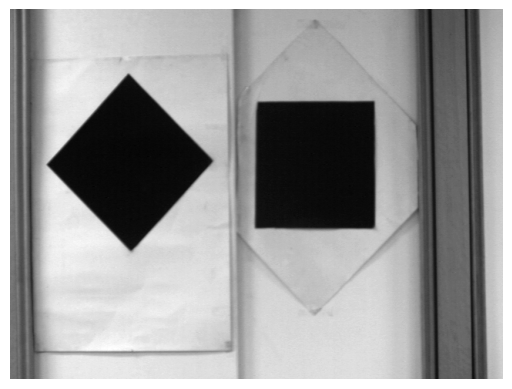

In [17]:
lab_112_image = cv2.imread(LAB_112_FILENAME, flags=cv2.IMREAD_GRAYSCALE)

show_grayscale_image(plt, lab_112_image)

2. Wykorzystując wszystkie poznane techniki przetwarzania obrazów (filtracja, przekształcenia morfologiczne, binaryzację, detekcję krawędzi) wyodrębnij krawędzie samych kwadratów - tak aby były jak najlepszej jakości (cienkie) - jednocześnie eliminując z obrazu zakłócenia.

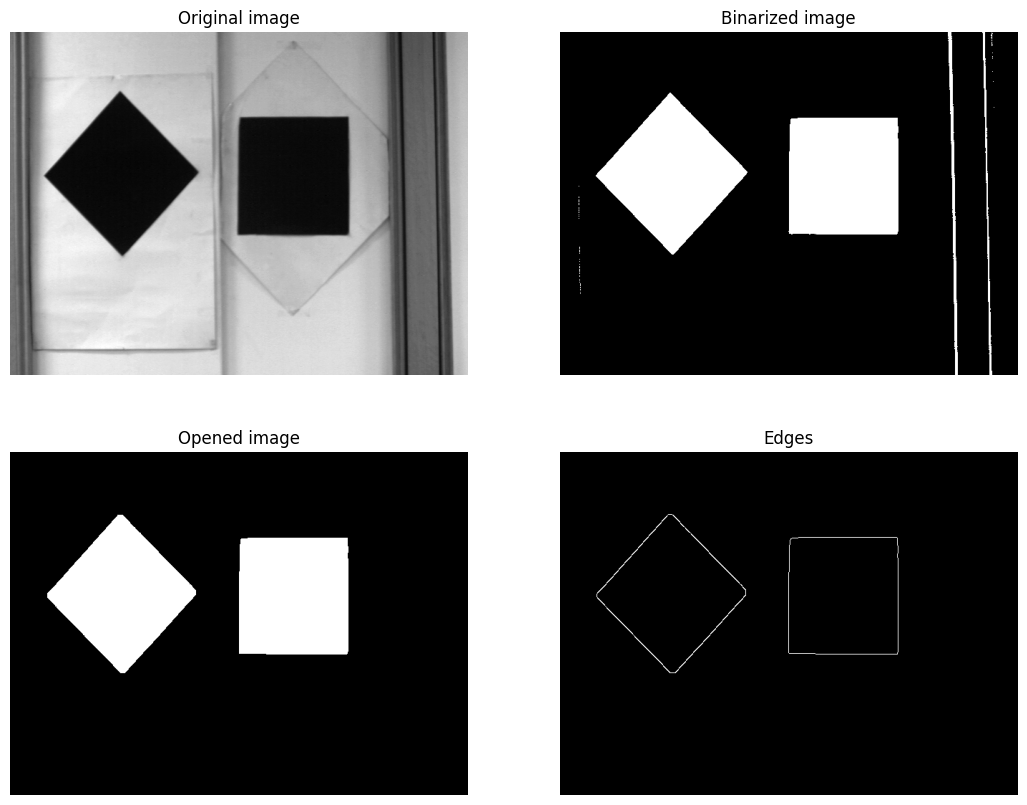

In [18]:
KERNEL_SIZE = 3
ITERATIONS = 3

lab_112_binarized = (lab_112_image < 50).astype(np.uint8)
kernel = np.ones((KERNEL_SIZE, KERNEL_SIZE), np.uint8)
lab_112_eroded = cv2.erode(lab_112_binarized, kernel, iterations=ITERATIONS)
lab_112_opened = cv2.dilate(lab_112_eroded, kernel, iterations=ITERATIONS)

lab_112_edges = cv2.Canny(
    image=lab_112_opened,
    threshold1=0,
    threshold2=1,
)

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(13, 10))

for ax, (title, image) in zip(
    [ax for row in axs for ax in row],
    [
        ("Original image", lab_112_image),
        ("Binarized image", lab_112_binarized),
        ("Opened image", lab_112_opened),
        ("Edges", lab_112_edges),
    ],
):
    show_grayscale_image(ax, image, title)

3. Wykorzystaj funkcje *hough_line* i *hough_line_peaks* do detekcji linii na obrazie, a następnie np. wykorzystując kod z punktu 8 poprzedniego ustępu wyrysuj na oryginalnym obrazie znalezione linie.

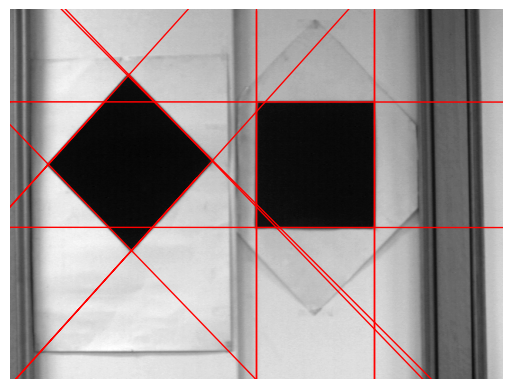

In [19]:
found_lines = find_lines(image=lab_112_edges, threshold=100)

fig, ax = plt.subplots()

show_grayscale_image(ax, image=lab_112_image)
draw_lines(ax, lines=found_lines)

plt.show()

4. Wczytaj obraz "dom.png". Wypróbuj działanie transformacji Hougha na tym obrazie z wykorzystaniem funkcji _cv2.HoughLinesP_  (oczywiście po odpowiednich przekształceniach). Postaraj się tak przygotować obraz z krawędziami i dobrać parametry aby wyrysować na oryginalnym obrazie odcinki obejmujące zarysy domu. Weź pod uwage dodatkowe parametry funkcji, takie jak:   minLineLength, maxLineGap.

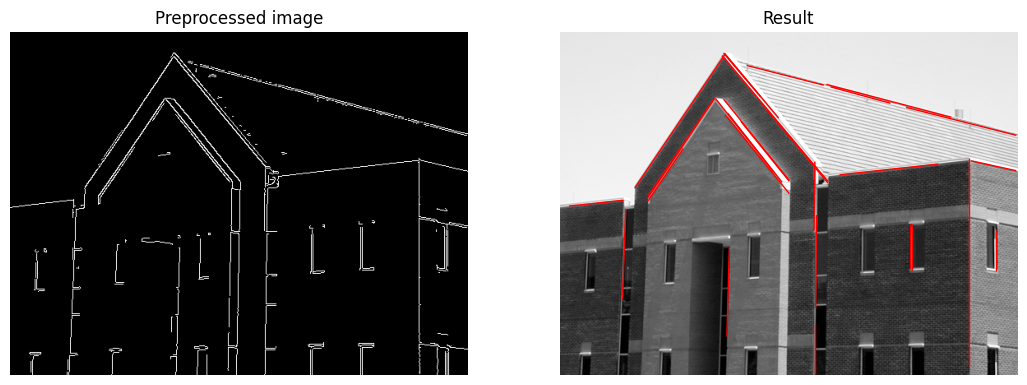

In [20]:
house_image = cv2.imread(HOUSE_FILENAME, flags=cv2.IMREAD_GRAYSCALE)

house_preprocessed_image = cv2.Canny(
    image=house_image,
    threshold1=300,
    threshold2=400,
)

found_lines = find_lines_propabilistic(
    image=house_preprocessed_image,
    scale_factor=None,
    threshold=10,
    min_line_length=50,
    max_line_gap=5,
)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(13, 6))

show_grayscale_image(ax1, image=house_preprocessed_image, title="Preprocessed image")
show_grayscale_image(ax2, image=house_image, title="Result")
draw_lines(ax2, lines=found_lines)